$$Diego \space Castillo \space Reyes$$

<h1 align="center">QFT para n qubits</h1>

In [6]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

In [7]:
# ask for number of qubits and the state to initialize
qubits = n = int(input("Enter the number of qubits: "))

Initializing state |1110>


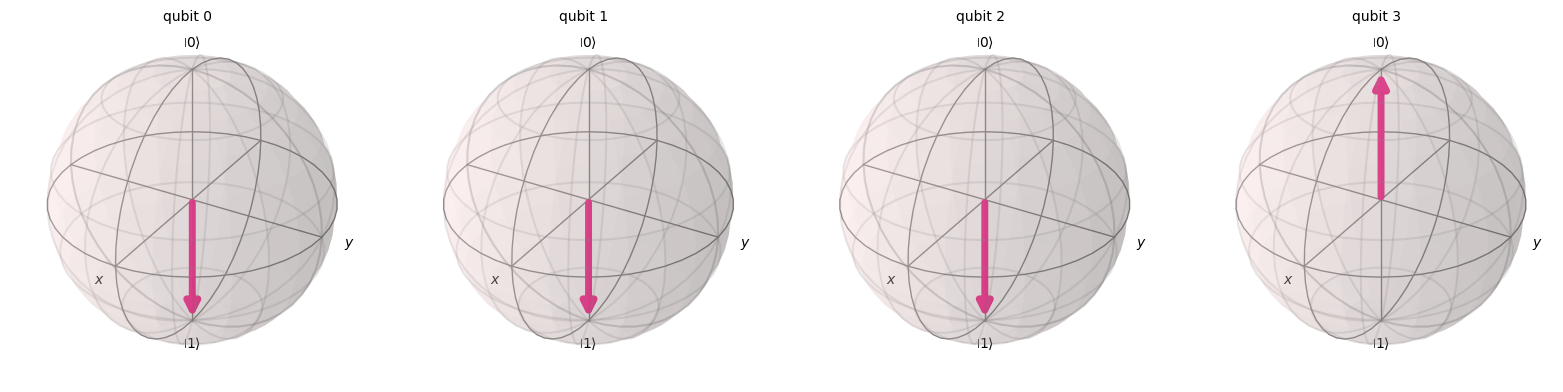

In [8]:
# define the circuit
qc = QuantumCircuit(qubits)

# initialize the state randomly
random_state = np.random.randint(0, 2**qubits)
binary_state = format(random_state, f'0{qubits}b')
print(f"Initializing state |{binary_state}>")
for i, bit in enumerate(binary_state):
    if bit == '1':
        qc.x(i)
qc.barrier()

# plot initial state on Bloch sphere
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

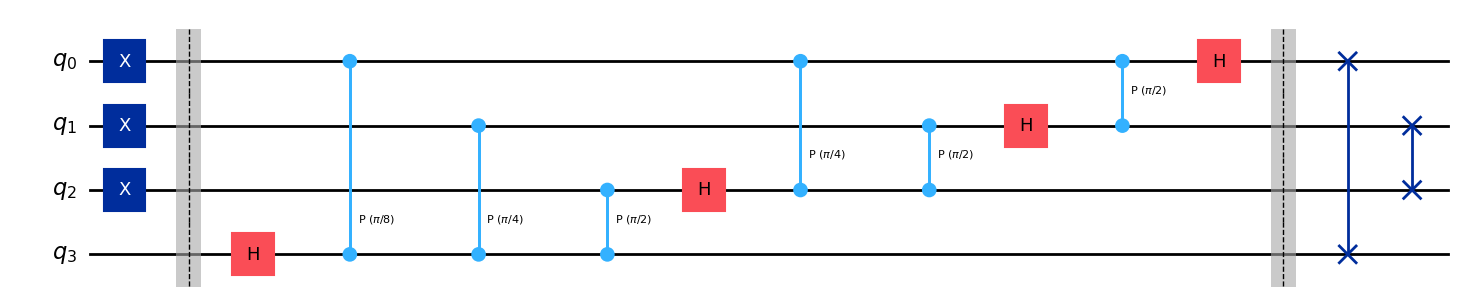

In [9]:
# QFT implementation
for i in range(n):
    if n == 0:
        break
    n -= 1
    qc.h(n)
    for j in range(n):
        qc.cp(np.pi / 2**(n - j), j, n)
qc.barrier()

# swap qubits
for i in range(qubits // 2):
    qc.swap(i, qubits - 1 - i)
    
qc.draw('mpl')

Statevector([ 0.25 -0.j   , -0.25 +0.j   , -0.   -0.25j ,  0.   +0.25j ,
              0.177-0.177j, -0.177+0.177j, -0.177-0.177j,  0.177+0.177j,
             -0.231+0.096j,  0.231-0.096j,  0.096+0.231j, -0.096-0.231j,
             -0.096+0.231j,  0.096-0.231j,  0.231+0.096j, -0.231-0.096j],
            dims=(2, 2, 2, 2))


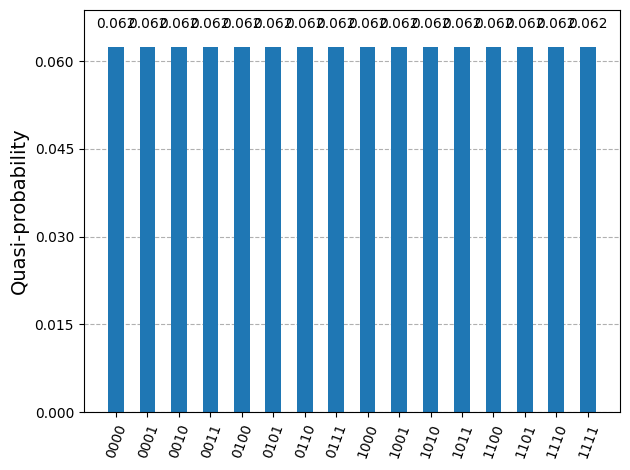

In [10]:
# Define the simulator
backend = Aer.get_backend("statevector_simulator")

# Compile the circuit on the computer or simulator
compiled_circuit = transpile(qc, backend=backend)
# Execute the circuit on the simulator
job = backend.run(compiled_circuit, shots=1)
# Get the results of the execution
result = job.result()
# Get the counts of the results
counts = result.get_counts(qc)
# print the results as a state vector
print(result.get_statevector(compiled_circuit, decimals=3))
# Plot the results as a histogram
plot_histogram(counts)